#Task 3: Deep Neural Network in PyTorch

### **Installing Libraries**

In [ ]:
# Install necessary libraries if not already installed
!pip install tld
!pip install colorama
!pip install pandas
!pip install tabulate

### **Importing Libraries**

In [ ]:
#Importing Necessary Libraries

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tabulate import tabulate
from sklearn import tree
from colorama import Fore  #Colorama is a module to color the python outputs
from urllib.parse import urlparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

# Function to extract TLD from a URL
def extract_tld(url):
    try:
        return get_tld(url, as_object=True).fld
    except:
        return None

### **Loading the Dataset**

In [ ]:
# Loading the Dataset

'''
from google.colab import files
files.upload()
file = 'malicious_phish.csv'
'''

# Assuming the CSV file is in the specified path
file_path = 'https://drive.google.com/uc?id=1hVTzUkdLfLcAAO7iV8EtWMduy0HrOP5b'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first 20 rows of the DataFrame
#print(data.head(20))

# Display the first 20 rows of the DataFrame with manually controlled column width
data_truncated = data.head(20).apply(lambda x: x.str[:50])  # Truncate each column to 50 characters
print(tabulate(data_truncated, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════════════════════════════════════════════╤════════════╕
│    │ url                                                │ type       │
╞════╪════════════════════════════════════════════════════╪════════════╡
│  0 │ br-icloud.com.br                                   │ phishing   │
├────┼────────────────────────────────────────────────────┼────────────┤
│  1 │ mp3raid.com/music/krizz_kaliko.html                │ benign     │
├────┼────────────────────────────────────────────────────┼────────────┤
│  2 │ bopsecrets.org/rexroth/cr/1.htm                    │ benign     │
├────┼────────────────────────────────────────────────────┼────────────┤
│  3 │ http://www.garage-pirenne.be/index.php?option=com_ │ defacement │
├────┼────────────────────────────────────────────────────┼────────────┤
│  4 │ http://adventure-nicaragua.net/index.php?option=co │ defacement │
├────┼────────────────────────────────────────────────────┼────────────┤
│  5 │ http://buzzfil.net/m/show-art/ils-etaient-lo

### **Extracting the Feature Vectors**

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
data['num_dots'] = data['url'].apply(lambda x: str(x).count('.'))

# Define a threshold for the number of dots
threshold_dots = 3  # Adjust this threshold as needed

# Create a new column 'is_bad_url' based on the number of dots threshold
data['is_bad_url'] = data['num_dots'] > threshold_dots

# Display the DataFrame
data.head(500)

,url,type,num_dots,is_bad_url,url_len
0,br-icloud.com.br,phishing,2,False,16
1,mp3raid.com/music/krizz_kaliko.html,benign,2,False,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,2,False,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,3,False,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,2,False,235
...,...,...,...,...,...
495,people.famouswhy.com/ramzi_yousef/,benign,2,False,34
496,wn.com/Raymond,benign,1,False,14
497,trtsport.cz,malware,1,False,11
498,youtube.com/watch?v=aYRauv5oeXQ,benign,1,False,31


In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

# Define a threshold for URL length
threshold_length = 90

# Create a new column 'is_bad_url' based on the length threshold
data['is_bad_url'] = data['url_len'] > threshold_length

# Display the DataFrame
data.head(500)

,url,type,num_dots,is_bad_url,url_len
0,br-icloud.com.br,phishing,2,False,16
1,mp3raid.com/music/krizz_kaliko.html,benign,2,False,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,2,False,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,3,False,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,2,True,235
...,...,...,...,...,...
495,people.famouswhy.com/ramzi_yousef/,benign,2,False,34
496,wn.com/Raymond,benign,1,False,14
497,trtsport.cz,malware,1,False,11
498,youtube.com/watch?v=aYRauv5oeXQ,benign,1,False,31


### **Training and Testing the dataset**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
file_path = 'https://drive.google.com/uc?id=1hVTzUkdLfLcAAO7iV8EtWMduy0HrOP5b'
data = pd.read_csv(file_path)

# Feature Engineering
data['num_dots'] = data['url'].apply(lambda x: str(x).count('.'))
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

# Define a threshold for URL length
threshold_length = 90
data['is_bad_url'] = data['url_len'] > threshold_length

# Separate features and labels
X = data[['num_dots', 'url_len']]
y = data['is_bad_url']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader for training and testing sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the neural network model
class PhishingClassifier(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(PhishingClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size1 = 128
hidden_size2 = 64
output_size = 2  # assuming binary classification

model = PhishingClassifier(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 10
training_losses = []  # initialize the list
accuracy_list = []    # initialize accuracy list

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    # Store the training loss for the current epoch
    training_losses.append(epoch_loss / len(train_loader))

    # Calculate training accuracy for the current epoch
    accuracy_train = correct_train / total_train
    accuracy_list.append(accuracy_train)

    # Print the current epoch, training loss, and accuracy
    print(f'Epoch [{epoch + 1}/{epochs}], Training Loss: {training_losses[-1]:.4f}, Training Accuracy: {accuracy_train * 100:.2f}%')

# Evaluate the model on the testing dataset
model.eval()
correct_test = 0
total_test = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted_test = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

accuracy_test = correct_test / total_test
print(f'Testing Accuracy: {accuracy_test * 100:.2f}%')


Epoch [1/10], Training Loss: 0.0081, Training Accuracy: 99.80%
Epoch [2/10], Training Loss: 0.0025, Training Accuracy: 99.94%
Epoch [3/10], Training Loss: 0.0018, Training Accuracy: 99.95%
Epoch [4/10], Training Loss: 0.0012, Training Accuracy: 99.97%
Epoch [5/10], Training Loss: 0.0010, Training Accuracy: 99.98%
Epoch [6/10], Training Loss: 0.0013, Training Accuracy: 99.97%
Epoch [7/10], Training Loss: 0.0009, Training Accuracy: 99.98%
Epoch [8/10], Training Loss: 0.0006, Training Accuracy: 99.98%
Epoch [9/10], Training Loss: 0.0008, Training Accuracy: 99.99%
Epoch [10/10], Training Loss: 0.0004, Training Accuracy: 99.99%
Testing Accuracy: 100.00%


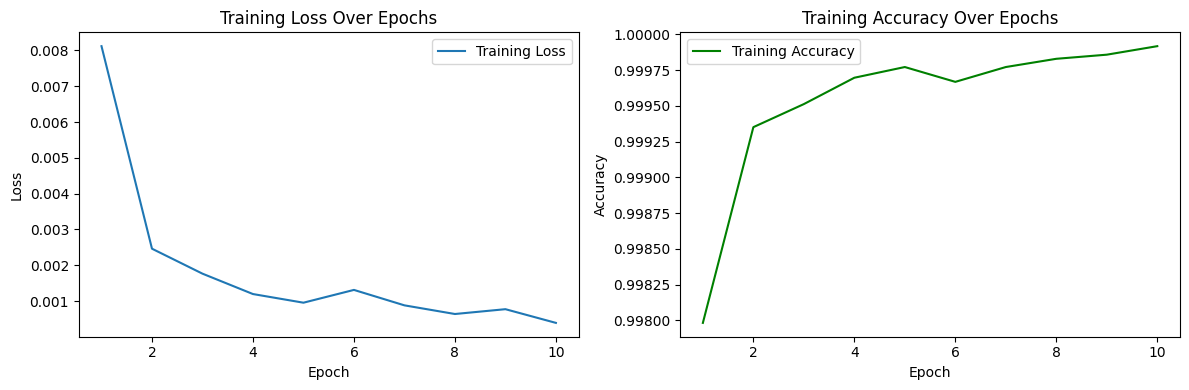

In [ ]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), training_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot the training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracy_list, label='Training Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()